In [233]:
import pandas as pd

In [234]:
export_volume = 1.2 # TWh # yearly export volume
ship_capacity = 0.05 # TWh # 0.05 TWh for new ones, 0.003 TWh for Susio Frontier
travel_time = 12*24 # hours # From Agadir to Rotterdam and back
fill_time = 6 # hours
unload_time = 6 # hours

In [235]:
landing = export_volume / ship_capacity # fraction of max delivery

In [236]:
# Loading, travel, pause, // loading
# fill_time
# travel_time
# pause_time

pause_time = 8760/landing - (fill_time+travel_time)

In [237]:
# throw error if pause time is negative

if pause_time < 0:
    raise ValueError("Pause time is negative. Reduce export volume or increase ship capacity.")

In [238]:
full_cycle = fill_time + travel_time + unload_time + pause_time

In [239]:
# fill_time ->  1
# travel_time, unload_time, pause_time -> 0

ship = pd.Series([1.0] * fill_time + [0.0] * int(travel_time + unload_time + pause_time)) #, index)
# extend ship series to 8760 hours
ship = pd.concat([ship]*1000, ignore_index=True)
ship = ship[:8760]


In [240]:
# Add index
index = pd.date_range(start="2013-01-01 00:00", end="2013-12-31 23:00", freq='H')
ship.index = index

<AxesSubplot:>

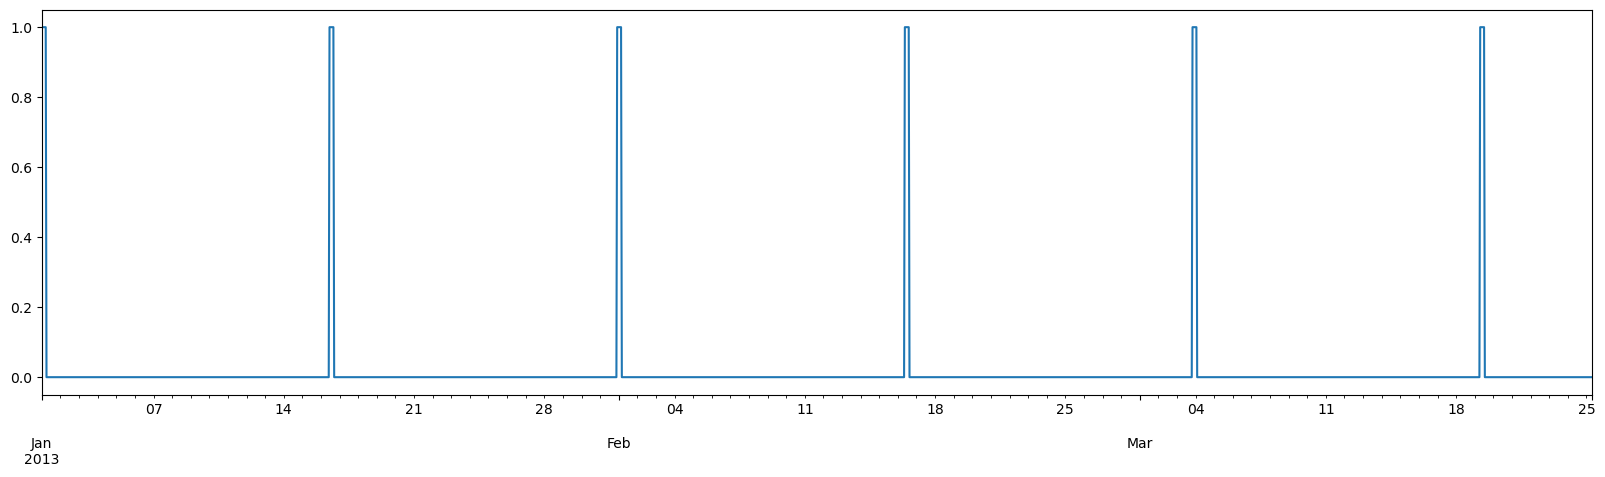

In [241]:
ship[:2000].plot(figsize=(20,5))

Max delivery

In [246]:
max_delivery = ship_capacity * 8760/travel_time # TWh/year

In [247]:
max_delivery

1.5208333333333333